In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio 
import librosa

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
22050


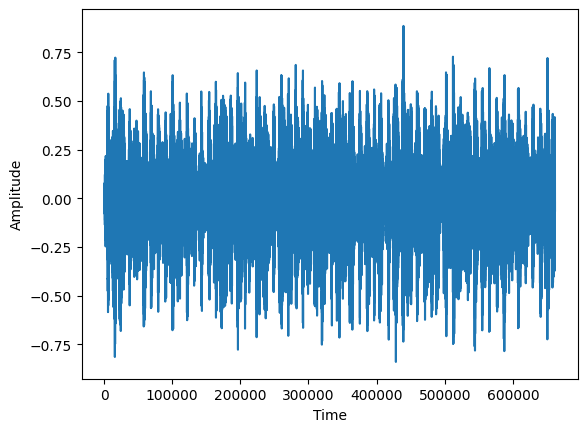

In [5]:
a = sf.read('blues.00000.wav')
signal, sr = a[0], a[1]
print(signal)
print(sr)
plt.plot(signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")

fft = np.fft.fft(signal)



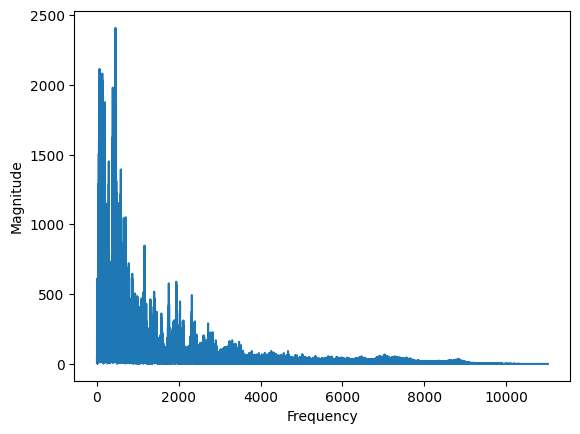

In [7]:
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

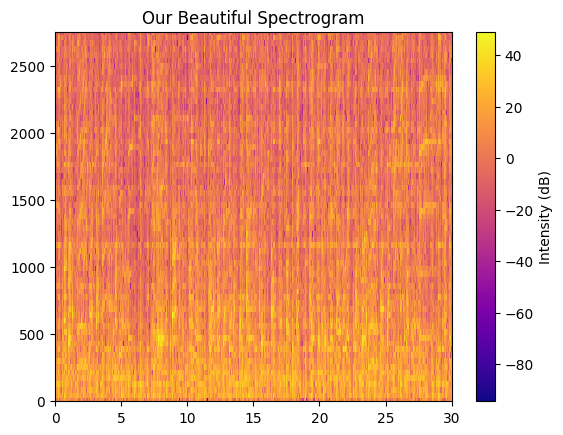

In [28]:
# n_fft = 2048
# hop_length = 512

# stft = librosa.core.stft(signal,hop_length = 512, n_fft = 2048)

# #spectrogram = np.abs(stft)
# librosa.display.specshot(spectrogram, sr = 22050, hop_length = 512)
# plt.plot(spectrogram)
# plt.xlabel("Frequency")
# plt.ylabel("Magnitude")
# plt.show()
def non_o_spec(in_arr, buff_sz):
    num_cols = int(np.ceil(len(in_arr) / buff_sz))
    mat = np.zeros([buff_sz, num_cols])
    
    for i in range(0, num_cols):
        start_ind = i * buff_sz
        end_ind = start_ind + buff_sz
        curr_buff = in_arr[start_ind:end_ind]
        mat[0:len(curr_buff),i] = curr_buff
        
    fft_col = 10*np.log(np.abs(np.fft.fft(mat,axis=0)))
    return fft_col,num_cols
frame_s = 512

dur = len(signal)/sr



analysis,num_co = non_o_spec(signal,frame_s)


f_vector = np.arange(0,sr,sr/frame_s)
t_vector = np.arange(0,dur,dur/num_co)
plt.pcolormesh(t_vector,f_vector, analysis,shading= 'nearest',cmap='plasma')
plt.ylim([0,sr/8])
plt.title('Our Beautiful Spectrogram')
plt.colorbar(label='Intensity (dB)')

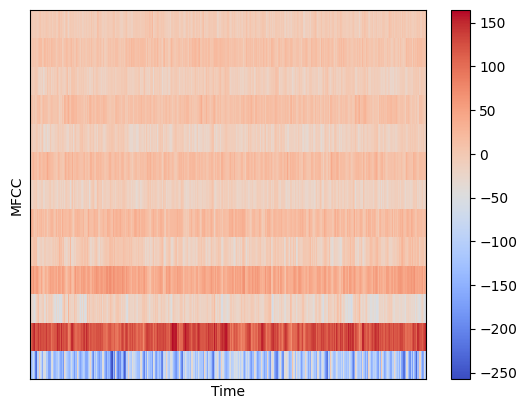

In [34]:
MFCCs = librosa.feature.mfcc(y = signal,sr = sr, n_fft = n_fft, hop_length = 512, n_mfcc = 13)
librosa.display.specshow(MFCCs, sr = sr, hop_length = 512)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()